# DiFuMo (Dictionaries of Functional Modes)

<div class="alert alert-block alert-danger">
<b>NEW:</b> New in release 0.7.1
</div>

## Outline

- <a href="#descr">Description</a>
- <a href="#howto">Description</a>
- <a href="#closer">Coser look on the object</a>
- <a href="#visualize">Visualize</a>

<span id="descr"></span>

## Description

- New atlas fetcher :func:`nilearn.datasets.fetch_atlas_difumo` 
- Download statistical maps which can serve as atlases to extract functional signals with different dimensionalities (64, 128, 256, 512, and 1024)
- These modes are optimized to represent well raw BOLD timeseries, over a with range of experimental conditions.

<span id="howto"></span>

## How to use it?

First of all, make sure you have nilearn >= 0.7.1 installed:

In [1]:
import nilearn
print(nilearn.__version__)

0.7.2.dev


If this is verified, we should be able to export the difumo fetcher from the `datasets` module:

In [2]:
from nilearn.datasets import fetch_atlas_difumo

/home/nicolas/GitRepos/nilearn-fork/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


The documentation for this function can be seen on the website [here](http://nilearn.github.io/modules/generated/nilearn.datasets.fetch_atlas_difumo.html#nilearn.datasets.fetch_atlas_difumo) or thanks to the Jupyter magic command:

In [3]:
?fetch_atlas_difumo

Signature:
fetch_atlas_difumo(
    dimension=64,
    resolution_mm=2,
    data_dir=None,
    resume=True,
    verbose=1,
)
Docstring:
Fetch DiFuMo brain atlas

Dictionaries of Functional Modes, or “DiFuMo”, can serve as atlases to extract
functional signals with different dimensionalities (64, 128, 256, 512, and 1024).
These modes are optimized to represent well raw BOLD timeseries,
over a with range of experimental conditions. See [1]_.

Notes
-----
Direct download links from OSF:

- 64: https://osf.io/pqu9r/download
- 128: https://osf.io/wjvd5/download
- 256: https://osf.io/3vrct/download
- 512: https://osf.io/9b76y/download
- 1024: https://osf.io/34792/download

Parameters
----------
dimension : int, optional
    Number of dimensions in the dictionary. Valid resolutions
    available are {64, 128, 256, 512, 1024}.
    Default=64.

resolution_mm : int, optional
    The resolution in mm of the atlas to fetch. Valid options
    available are {2, 3}. Default=2mm.

data_dir : string, opt

Looking at the docstring, it looks like there are mainly two parameters to control the data we wish to donwload:

- dimension: this will be the number of functional maps of the atlas. It must be 64, 128, 256, 512, or 1024
- resolution: this enables to download atlas sampled either at 2mm or 3mm resolution

Let's try it:

In [4]:
difumo_64 = fetch_atlas_difumo(dimension=64,    # Feel free to change these parameters!
                               resolution_mm=2)

/home/nicolas/anaconda3/envs/nilearn/lib/python3.8/site-packages/numpy/lib/npyio.py:2405: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


This should have either downloaded the 64 component atlas sampled at 2mm from osf, or simply grabed the data in the nilearn cache if you have downloaded it already.

<span id="closer"></span>

## Closer look on the object

Like for any dataset in nilearn, the resulting object is a scikit-learn Bunch object with the following keys:

- description: string describing the dataset
- maps: the actual data
- labels: label information for the maps

In [5]:
type(difumo_64)

sklearn.utils.Bunch

In [6]:
difumo_64.keys()

dict_keys(['description', 'maps', 'labels'])

Reading the description before usage is always recommanded:

In [7]:
print(difumo_64.description.decode()) # Note that description strings will be soon shipped as Python strings, 
                                      # avoiding the anoying call to decode...

DiFuMo atlas


Notes
-----
1. We provide Dictionaries of Functional Modes “DiFuMo” that can serve as atlases to extract functional signals, eg to serve as IDPs, with different dimensionalities (64, 128, 256, 512, and 1024). These modes are optimized to represent well raw :term:`BOLD` timeseries, over a with range of experimental conditions.
               
    - All atlases are available in .nii.gz format and sampled to :term:`MNI` space
                     
2. Additionally, we provide meaningful names for these modes, based on their anatomical location, to facilitate reporting of results.

    - Anatomical names are available for each resolution in .csv

Content
-------
    :'maps': Nifti images with the (probabilistic) region definitions
    :'labels': CSV file specifying the label information


References
----------
For more information about this dataset's structure:
https://hal.inria.fr/hal-02904869

Dadi, K., Varoquaux, G., Machlouzarides-Shalit, A., Gorgolewski, KJ., Wassermann

Label information is directly available:

In [8]:
assert len(difumo_64.labels) == 64 # We have one label information tuple per component
difumo_64.labels[:6] # Print the first 6 label information

rec.array([(1, 'Superior frontal sulcus', 'DefaultB', 'DefaultA', 0.68999562, 0.18570919, 0.11688445),
           (2, 'Fusiform gyrus', 'No network found', 'No network found', 0.84473252, 0.02102643, 0.13378859),
           (3, 'Calcarine cortex posterior', 'VisCent', 'VisPeri', 0.60176782, 0.30206712, 0.09129732),
           (4, 'Cingulate cortex posterior', 'DefaultB', 'DefaultA', 0.74008596, 0.14036829, 0.11956689),
           (5, 'Parieto-occipital sulcus superior', 'ContA', 'ContC', 0.64015691, 0.24149216, 0.11782555),
           (6, 'Insula antero-superior', 'SalVentAttnA', 'SalVentAttnB', 0.78637287, 0.0641708 , 0.14549075)],
          dtype=[('component', '<i8'), ('difumo_names', '<U49'), ('yeo_networks7', '<U16'), ('yeo_networks17', '<U16'), ('gm', '<f8'), ('wm', '<f8'), ('csf', '<f8')])

We can see that each component has: 

- a label index going from 1 to 64
- a name
- a network (todo: explain)
- a network (todo: explain)
- coordinates (todo: explain)

Finally, the actual data is a simple path to a nifti image on disk, which is the usual way to represent niimg in Nilearn:

In [9]:
difumo_64.maps

'/home/nicolas/nilearn_data/difumo_atlases/64/2mm/maps.nii.gz'

If you wan to have a look at the actual data, you can open this image using usual nilearn loading utilities:

In [10]:
from nilearn.image import get_data
raw_maps = get_data(difumo_64.maps) # raw_maps is a 4D numpy array holding the 
raw_maps.shape                      # coefficients of the functional modes

(104, 123, 104, 64)

<span id="visualize"></span>

## Visualize it

**Method 1**

Looking at probabilitic atlases can be done with the function `plot_prob_atlas` of the `plotting` module:

/home/nicolas/GitRepos/nilearn-fork/nilearn/plotting/displays.py:101: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


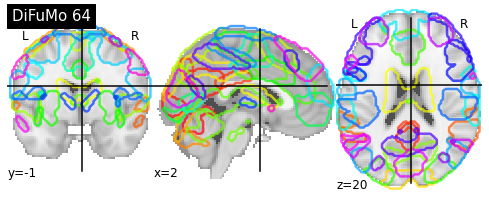

In [11]:
from nilearn.plotting import plot_prob_atlas

plot_prob_atlas(difumo_64.maps, title='DiFuMo 64')

**Method 2**

Another way to visualize the atlas is through the report of the `NiftiMapsMasker` object. 

<div class="alert alert-block alert-danger">
<b>Danger:</b> This feature is under development and still not available in 0.7.1. I might remove this section if I don't submit my PR in time.
</div>

In [12]:
from nilearn.input_data import NiftiMapsMasker
masker = NiftiMapsMasker(difumo_64.maps)
masker

NiftiMapsMasker(maps_img='/home/nicolas/nilearn_data/difumo_atlases/64/2mm/maps.nii.gz')